## EXPLORATORY DATA ANALYST ON GLOBAL VIDEO GAME SALES

The dataset chosen comes from Metacritic's reviews from 2016 for video games.
Kaggle: https://www.kaggle.com/datasets/thedevastator/global-video-game-sales-ratings

 The columns for this dataset are described as below:

|Column                       |Description    |
|:------------------------------|:---------|
Name|	The name of the game (String)
Platform| The electronic delivery system used to launch or play (String)
NA_Sales|	Game sales in North America in millions of units (Float)
EU_Sales|	Game sales in European Union in millions of units (Float)
JP_Sales|	Game sales in Japanin millions of units (Float)
Other_Sales|	Game sales in Oher portions of the world in millions of units (Float)
Global_Sales|	Game sales in North America in millions of units (Float)
Critic_Score|	Aggregate score compiled by Metacritic staff (Float)
Critic_Count|	The number of critics used in comin up wiht the Critic_Score (Integer)
User_Score|	Score by Metacritic's subscribers (Float)
User_Count|	Number of users who gave the User_Score (Integer)
Developer|	Party responsible for creating the game (String)
Rating|	ESRB ratings (String)


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/************/Raw Data.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

In [3]:
def understand(df):
    rows, columns = df.shape
    lst_columns = df.columns
    datatypes = df.dtypes
    
    print(f'The dataset has {rows} rows and {columns} columns')
    print(' ')
    print(f'Columns: {lst_columns}')
    print(' ')
    print(f'Datatypes: {datatypes}')

In [7]:
understand(df)

The dataset has 16719 rows and 16 columns
 
Columns: Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
 
Datatypes: Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [4]:
def nunique_object_data(df):
    object_type = df.dtypes == 'object' 
    filtered_list = object_type.index[object_type].tolist() 
    return df[filtered_list].nunique()

In [5]:
nunique_object_data(df)

Name          11562
Platform         31
Genre            12
Publisher       581
User_Score       96
Developer      1696
Rating            8
dtype: int64

In [23]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,2007.436108,0.394541,0.236123,0.064168,0.082689,0.777702,70.270223,28.932151,7.185873,174.733148
std,4.211194,0.967444,0.687375,0.287590,0.269889,1.963565,13.868733,19.225391,1.439903,587.470906
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,0.110000,62.000000,14.000000,6.500000,11.000000
50%,2007.000000,0.150000,0.060000,0.000000,0.020000,0.290000,72.000000,25.000000,7.500000,27.000000
75%,2011.000000,0.390000,0.210000,0.010000,0.070000,0.750000,80.000000,39.000000,8.200000,88.250000
max,2016.000000,41.360000,28.960000,6.500000,10.570000,82.530000,98.000000,113.000000,9.600000,10665.000000


## Data Processing

In [6]:
missing_value_cnt = df.isna().sum()
missing_value_cnt

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
ttl_cells = np.product(df.shape)
ttl_missing_values = missing_value_cnt.sum()

pct_of_missing = (ttl_missing_values/ttl_cells)*100
print(f'{ttl_missing_values} out of {ttl_cells} ({pct_of_missing:.2f}%) missing')

46716 out of 267504 (17.46%) missing


In [8]:
df = df.dropna(how='any')\
    .reset_index(drop=True)\
    .copy()

In [9]:
missing_value_cnt2 = df.isna().sum()
missing_value_cnt2

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [10]:
df[df.duplicated()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


In [11]:
df.loc[df.duplicated(subset=['Name'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
13,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.66,5.14,0.06,1.41,16.27,97.0,58.0,8.1,3711.0,Rockstar North,M
20,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
22,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M
26,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,12.63,88.0,58.0,6.4,1094.0,Treyarch,M
27,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.96,6.31,0.38,1.97,12.61,97.0,66.0,8.3,2899.0,Rockstar North,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,Saints Row: Gat out of Hell,XOne,2015.0,Action,Deep Silver,0.00,0.01,0.00,0.00,0.01,65.0,16.0,6,27.0,Volition Inc.,M
6814,Legacy of Kain: Defiance,PC,2003.0,Action,Eidos Interactive,0.00,0.01,0.00,0.00,0.01,70.0,11.0,8.7,67.0,Nixxes Software,M
6817,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E
6821,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M


In [12]:
df.loc[df.duplicated(subset=['Name','Platform'])]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1016,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.0,0.13,0.02,0.10,1.25,83.0,54.0,8.5,134.0,EA Canada,T
5675,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.0,0.06,0.00,0.02,0.08,82.0,19.0,8.5,525.0,Black Box,T
6755,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.0,0.01,0.00,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [13]:
df.loc[1016,'Name'] = 'Need for Speed: Most Wanted 2005'
df.loc[5675,'Name'] = 'Need for Speed: Most Wanted 2012'
df.loc[[1016, 5675],'Name']

1016    Need for Speed: Most Wanted 2005
5675    Need for Speed: Most Wanted 2012
Name: Name, dtype: object

In [14]:
df.loc[df['Name'] == 'Madden NFL 13']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
347,Madden NFL 13,X360,2012.0,Sports,Electronic Arts,2.53,0.15,0.0,0.17,2.86,81.0,36.0,5.8,179.0,EA Tiburon,E
408,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.22,0.0,0.23,2.56,83.0,22.0,5.5,101.0,EA Tiburon,E
3366,Madden NFL 13,PSV,2012.0,Sports,Electronic Arts,0.28,0.00,0.0,0.02,0.30,63.0,6.0,7.3,38.0,EA Tiburon,E
3879,Madden NFL 13,WiiU,2012.0,Sports,Electronic Arts,0.21,0.00,0.0,0.02,0.23,75.0,9.0,6.7,30.0,EA Tiburon,E
6755,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.0,0.00,0.01,83.0,22.0,5.5,101.0,EA Tiburon,E


In [15]:
df = df.loc[~df.duplicated(subset=['Name','Platform'])].reset_index(drop=True).copy()

In [16]:
df['Year_of_Release'] = df['Year_of_Release'].astype('int')
df['User_Score'] = df['User_Score'].astype('float')
df[['Genre','Rating']] = df[['Genre','Rating']].astype('category')
df.dtypes

Name                 object
Platform             object
Year_of_Release       int64
Genre              category
Publisher            object
NA_Sales            float64
EU_Sales            float64
JP_Sales            float64
Other_Sales         float64
Global_Sales        float64
Critic_Score        float64
Critic_Count        float64
User_Score          float64
User_Count          float64
Developer            object
Rating             category
dtype: object

## Analysis

In [17]:
platform = pd.DataFrame(df.groupby(by=["Platform"])["Platform"].count().sort_values(ascending=False))

platform

,Platform
Platform,
PS2,1140
X360,858
PS3,768
PC,651
XB,565
Wii,479
DS,464
PSP,390
GC,348


In [18]:
year = pd.DataFrame(df.groupby(by=["Year_of_Release"])["Platform"].count().sort_values(ascending=False))

year

,Platform
Year_of_Release,
2008,592
2007,590
2005,562
2009,550
2006,528
2003,498
2004,476
2002,455
2011,453


In [19]:
genre = pd.DataFrame(df.groupby(by=["Genre"])["Platform"].count().sort_values(ascending=False))

genre

,Platform
Genre,
Action,1630
Sports,942
Shooter,864
Role-Playing,712
Racing,581
Platform,403
Misc,384
Fighting,378
Simulation,297


In [20]:
publisher10 = pd.DataFrame(df.groupby(by=["Publisher"])["Platform"].count().sort_values(ascending=False).head(10))

publisher10

,Platform
Publisher,
Electronic Arts,943
Ubisoft,496
Activision,492
Sony Computer Entertainment,316
THQ,307
Nintendo,291
Sega,284
Take-Two Interactive,273
Konami Digital Entertainment,244


In [21]:
developer10 = pd.DataFrame(df.groupby(by=["Developer"])["Platform"].count().sort_values(ascending=False).head(10))

developer10

,Platform
Developer,
EA Canada,149
EA Sports,142
Capcom,126
Ubisoft,103
Konami,95
Ubisoft Montreal,87
EA Tiburon,81
Omega Force,69
Nintendo,68


In [27]:
genre_sales = df[['Genre','NA_Sales','EU_Sales','JP_Sales','Global_Sales']].copy()
genre_sales.set_index('Genre', inplace=True)

genre_sales = genre_sales.reset_index().melt(id_vars=['Genre'], var_name='Region', value_name='Sales')
genre_sales

,Genre,Region,Sales
0,Sports,NA_Sales,41.36
1,Racing,NA_Sales,15.68
2,Sports,NA_Sales,15.61
3,Platform,NA_Sales,11.28
4,Misc,NA_Sales,13.96
...,...,...,...
27291,Action,Global_Sales,0.01
27292,Fighting,Global_Sales,0.01
27293,Action,Global_Sales,0.01
27294,Shooter,Global_Sales,0.01


/var/folders/f_/96861gln1q90fs6nkm_n2hlw0000gn/T/ipykernel_870/1036174177.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=genre_sales, x='Genre',y='Sales',hue='Region', ci=None, ax=ax, palette=palette)


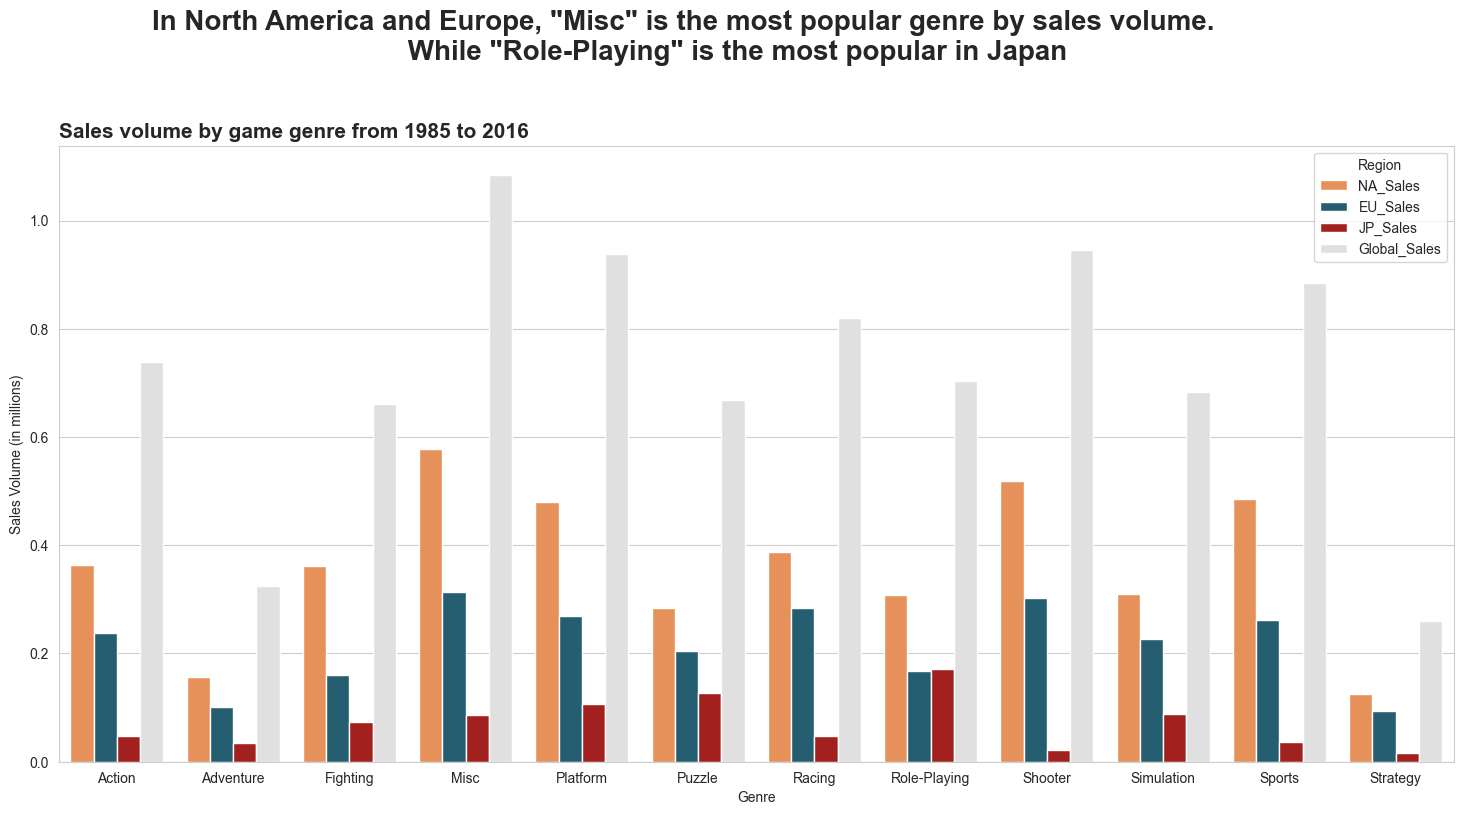

In [50]:
fig, ax = plt.subplots(figsize=(18,8))

palette = {'NA_Sales': '#FF8C42', 'EU_Sales': '#19647E', 'JP_Sales': '#B80C09', 'Global_Sales': '#E0E0E0'}

sns.set_style('whitegrid')
sns.barplot(data=genre_sales, x='Genre',y='Sales',hue='Region', ci=None, ax=ax, palette=palette)

plt.suptitle('In North America and Europe, "Misc" is the most popular genre by sales volume. \
            \n While "Role-Playing" is the most popular in Japan', y=1.05,fontsize=20, fontweight='bold')
plt.title('Sales volume by game genre from 1985 to 2016', loc='left', fontsize=15, fontweight='bold')
plt.ylabel('Sales Volume (in millions)')

plt.show()

**NOTES**

"Misc" is the most popular genre by sales in North America and Europe, Its seems not happening to Japan Gamers. While in Japan, "Role-Playing" Genre is more popular even have higher sales then Europe. 

Let's get deeper into Misc games.

In [47]:
misc = df.query('Genre == "Misc"').reset_index(drop=True).copy()
misc = misc.drop(['Platform','Genre'],axis=1)

misc = misc.groupby(['Name','Year_of_Release','Publisher','Developer'])[['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']].sum().reset_index()
misc

,Name,Year_of_Release,Publisher,Developer,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,1 vs. 100,2008,DSI Games,ECI,0.08,0.00,0.0,0.01,0.08,38.0,5.0,3.2,5.0
1,AC/DC LIVE: Rock Band Track Pack,2008,MTV Games,Harmonix Music Systems,0.42,0.01,0.0,0.04,0.47,123.0,28.0,10.2,24.0
2,Activision Anthology,2002,Activision,Contraband Entertainment,0.25,0.19,0.0,0.06,0.50,75.0,13.0,7.7,6.0
3,Alvin and the Chipmunks,2007,Brash Entertainment,Sensory Sweep,0.04,0.03,0.0,0.01,0.07,33.0,5.0,4.5,6.0
4,Alvin and the Chipmunks,2007,Eidos Interactive,Sensory Sweep,0.05,0.00,0.0,0.00,0.05,30.0,4.0,3.6,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,You're in the Movies,2008,Microsoft Game Studios,Zoe Mode,0.27,0.17,0.0,0.05,0.48,55.0,21.0,5.5,20.0
316,Zubo,2008,Electronic Arts,EA Bright Light,0.08,0.02,0.0,0.01,0.11,75.0,19.0,7.6,75.0
317,Zumba Fitness Core,2012,505 Games,Zoe Mode,0.00,0.05,0.0,0.00,0.05,77.0,6.0,6.7,6.0
318,Zumba Fitness: World Party,2013,Majesco Entertainment,Zoe Mode,0.17,0.05,0.0,0.02,0.24,73.0,5.0,6.2,40.0


In [48]:
misc_na = misc[['Name', 'NA_Sales']].sort_values(by=['NA_Sales'],ascending=False).reset_index(drop=True)
misc_eu = misc[['Name', 'EU_Sales']].sort_values(by=['EU_Sales'],ascending=False).reset_index(drop=True)
misc_jp = misc[['Name', 'JP_Sales']].sort_values(by=['JP_Sales'],ascending=False).reset_index(drop=True)

In [49]:
rankingmisc = pd.concat([misc_na,misc_eu,misc_jp], axis=1)
rankingmisc.head(10)

,Name,NA_Sales,Name,EU_Sales,Name,JP_Sales
0,Kinect Adventures!,15.00,Brain Age: Train Your Brain in Minutes a Day,9.20,Brain Age: Train Your Brain in Minutes a Day,4.16
1,Wii Play,13.96,Wii Play,9.18,Wii Play,2.93
2,Just Dance 3,7.75,Kinect Adventures!,4.89,Wii Party,2.49
3,Just Dance 2,5.80,Just Dance 3,3.70,Mario Party DS,1.98
4,Just Dance 4,5.21,Wii Party,3.47,Rhythm Heaven,1.93
5,Brain Age: Train Your Brain in Minutes a Day,4.74,Just Dance,2.99,Big Brain Academy,1.60
6,Namco Museum,4.73,Just Dance 2,2.85,Mario Party 8,1.58
7,Guitar Hero III: Legends of Rock,4.59,Big Brain Academy,2.75,PaRappa The Rapper,1.46
8,Mario Party DS,4.40,Just Dance 4,2.46,Flash Focus: Vision Training in Minutes a Day,1.05
9,Guitar Hero II,3.81,EyeToy Play,2.30,Personal Trainer: Cooking,1.03


**NOTES**
<br></br>
In North America and Europe, the "Misc" game is dominated by Wii and Just Dance series. 
This kind of phenomenom seems doesn't spread to gamers in Japan.

Now lets dive in to the Japan's market.

In [51]:
role = df.query('Genre == "Role-Playing"').reset_index(drop=True).copy()
role = role.drop(['Platform','Genre'],axis=1)

role = role.groupby(['Name','Year_of_Release','Publisher','Developer'])[['NA_Sales','EU_Sales','JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count']].sum().reset_index()
role_na = role[['Name', 'NA_Sales']].sort_values(by=['NA_Sales'],ascending=False).reset_index(drop=True)
role_eu = role[['Name', 'EU_Sales']].sort_values(by=['EU_Sales'],ascending=False).reset_index(drop=True)
role_jp = role[['Name', 'JP_Sales']].sort_values(by=['JP_Sales'],ascending=False).reset_index(drop=True)

In [54]:
role_jp.head(10)

,Name,JP_Sales
0,Dragon Quest IX: Sentinels of the Starry Skies,4.35
1,Monster Hunter Freedom Unite,4.13
2,Final Fantasy VIII,3.63
3,Dragon Quest VIII: Journey of the Cursed King,3.61
4,Final Fantasy VII,3.28
5,Final Fantasy IX,2.78
6,Final Fantasy X,2.73
7,Pokémon Platinum Version,2.69
8,Monster Hunter 4 Ultimate,2.62
9,Final Fantasy XII,2.33


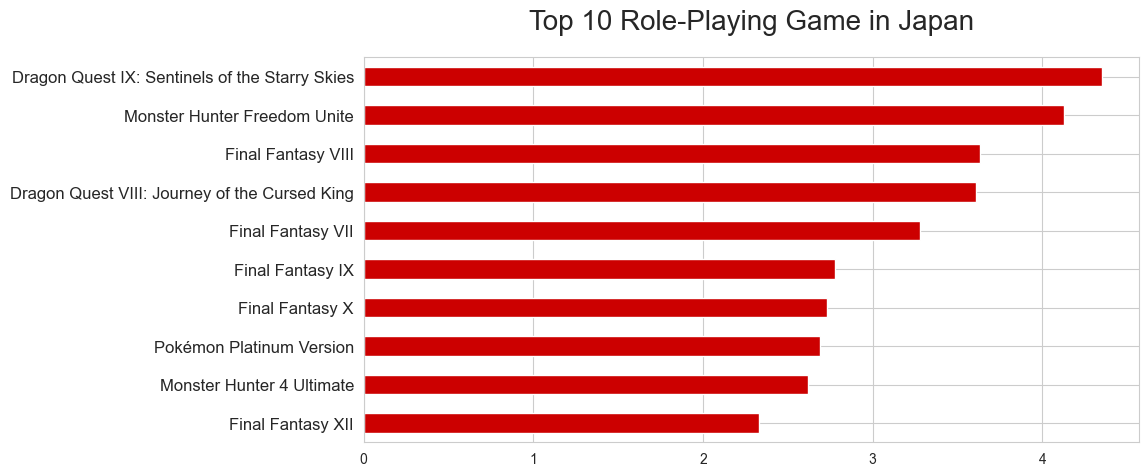

In [52]:
top10_roleplaying = role_jp.head(10).set_index('Name').sort_values(by=['JP_Sales'], ascending=True)

ax = top10_roleplaying.plot(kind='barh', color=['#CC0000'], figsize=(10,5))
ax.set_title('Top 10 Role-Playing Game in Japan', fontsize=20, pad=20)
ax.set(ylabel=None)
ax.legend().remove()
plt.yticks(fontsize=12)

plt.show()

In [55]:
developer_jp = df.groupby('Developer')['JP_Sales'].sum().sort_values(ascending=False)
developer_jp.head(10)

Developer
Nintendo             88.82
Capcom               32.72
SquareSoft           21.50
Square Enix          16.06
Omega Force          14.36
Level 5              13.63
Namco                10.96
Polyphony Digital     8.98
Konami                8.68
HAL Labs              8.06
Name: JP_Sales, dtype: float64

In [60]:
genre_nintendo = df.query("Developer == 'Nintendo'")\
                .groupby('Genre')['Genre']\
                .count()\
                .sort_values(ascending=False)\
                .to_frame('Genre of Games Developed by Nintendo')
genre_nintendo


,Genre of Games Developed by Nintendo
Genre,
Platform,15
Action,12
Misc,8
Puzzle,6
Sports,6
Adventure,5
Simulation,5
Racing,4
Shooter,4


**NOTES**
<br></br>
Surprisingly, the leading developer games in Japan based on sales, Nintendo, has yet to release any the most played genre in Japan which is the "Role-Playing" games. 

In [63]:
top10dev_rp2 = pd.DataFrame(df[(df['Genre']=='Role-Playing')]\
                            .groupby(by=["Developer"])["Name"]\
                            .count()\
                            .sort_values(ascending=False)\
                            .to_frame('Top 10 "Role-Playing" Developers')
                            .head(10))
top10dev_rp2

,"Top 10 ""Role-Playing"" Developers"
Developer,
Square Enix,28
BioWare,18
Nippon Ichi Software,18
Obsidian Entertainment,16
From Software,16
TOSE,15
SquareSoft,15
Capcom,14
Atlus,12


## Recommendations

Based on this exploratory, I have few recommendations here :

**For Nintendo** as Developer : 

As "Role-Playing" is the favorite genre in Japan, yet till 2016 they haven't developed this type of game. As the leading game developer in Japan, they may consider creating "Role-Playing" games to tap into this massive market and diversify their game offerings.

**For "Role-Playing" Developer** :

Entering Japan's market would be a great choice. By expanding their reach in Japan, where this genre is highly popular, they may increase their sales.

**For Other Developer** :

Because "Role-Playing" games are highly popular In Japan, If the others want to expand their business in Japan's Market, they might consider about making an innovation combining the other genres with "Role-Playing". Such as "Misc" - "Role-Playing" games or etc.
